In [3]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
# import data file:
os.chdir(r'D:\My py files\Data files\Data Sets')
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# drop columns that are of no use:

df.drop(df[['RowNumber', 'CustomerId', 'Surname']], axis = 'columns', inplace = True)

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df.shape

(10000, 11)

In [16]:
df[df.Exited == 1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


# Visualization

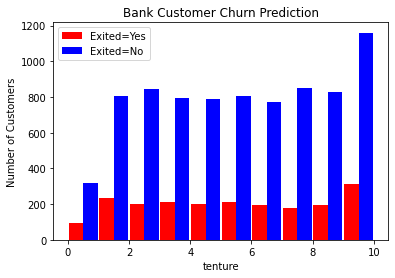

In [23]:
Exited_yes = df[df.Exited == 1].Tenure
Exited_no = df[df.Exited == 0].Tenure

plt.xlabel("tenture")
plt.ylabel("Number of Customers")
plt.title("Bank Customer Churn Prediction")

plt.hist([Exited_yes, Exited_no], rwidth=0.95, color=['r','b'],label=['Exited=Yes','Exited=No'])
plt.legend()

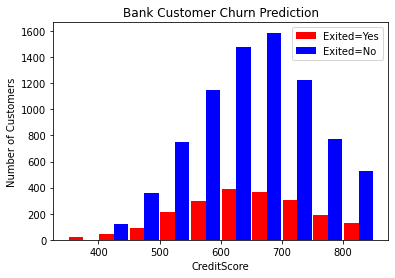

In [25]:
Exited_yes = df[df.Exited == 1].CreditScore
Exited_no = df[df.Exited == 0].CreditScore

plt.xlabel("CreditScore")
plt.ylabel("Number of Customers")
plt.title("Bank Customer Churn Prediction")

plt.hist([Exited_yes, Exited_no], rwidth=0.95, color=['r','b'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [26]:
df['Geography'].unique() 

array(['France', 'Spain', 'Germany'], dtype=object)

In [29]:
df['Gender'].unique() 

array(['Female', 'Male'], dtype=object)

In [30]:
df['Gender'].replace({'Female': 1,'Male': 0},inplace=True)

In [33]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [34]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [36]:
df1.dtypes # all features now have integer values 

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [37]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [39]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
df1[cols_to_scale] = scale.fit_transform(df1[cols_to_scale])

In [40]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [42]:
X = df1.drop('Exited', axis = 'columns')
y = df1['Exited']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [44]:
X_train.shape

(8000, 12)

In [45]:
X_test.shape

(2000, 12)

# Building an ANN model

In [46]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 444us/step - loss: 0.4972 - accuracy: 0.7955
Epoch 2/100
250/250 [==============================] - 0s 448us/step - loss: 0.4765 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 440us/step - loss: 0.4653 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 448us/step - loss: 0.4479 - accuracy: 0.8037
Epoch 5/100
250/250 [==============================] - 0s 444us/step - loss: 0.4268 - accuracy: 0.8150
Epoch 6/100
250/250 [==============================] - 0s 432us/step - loss: 0.4148 - accuracy: 0.8188
Epoch 7/100
250/250 [==============================] - 0s 444us/step - loss: 0.4040 - accuracy: 0.8229
Epoch 8/100
250/250 [==============================] - 0s 448us/step - loss: 0.3963 - accuracy: 0.8295
Epoch 9/100
250/250 [==============================] - 0s 440us/step - loss: 0.3892 - accuracy: 0.8331
Epoch 10/100
250/250 [==============================] - 0s 456us/step - l

In [47]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 429us/step - loss: 0.3569 - accuracy: 0.8520


[0.35688549280166626, 0.8519999980926514]

In [58]:
y_pred = model.predict(X_test)
y_pred[5:10]

array([[0.06793553],
       [0.00730774],
       [0.3651396 ],
       [0.00788301],
       [0.97358596]], dtype=float32)

In [62]:
y_pred1 = []
for element in y_pred:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [63]:
y_pred1[5:10]

[0, 0, 0, 0, 1]

In [64]:
y_test[5:10]

6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [66]:
from sklearn.metrics import classification_report, confusion_matrix 

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.77      0.39      0.51       405

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



Text(69.0, 0.5, 'actual')

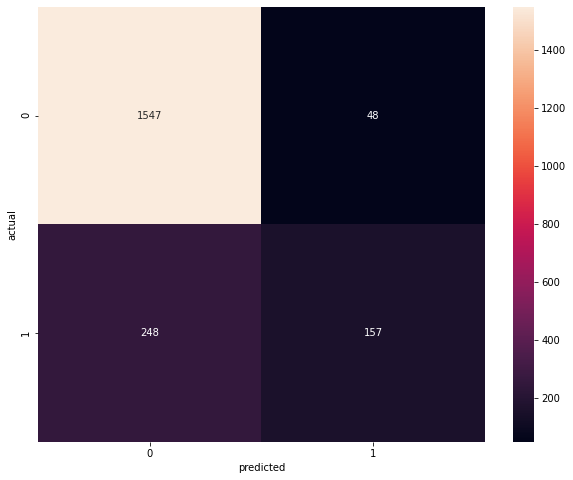

In [69]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred1)

plt.figure(figsize = (10,8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("actual")